<a href="https://colab.research.google.com/github/safimoh1993-star/MNIST-Classification-using-PyTorch/blob/main/MNIST%20Classification%20using%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

train_loader=torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data',train =True, download=True,
                               transform=transforms.ToTensor()),
    batch_size=64,shuffle=True)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,10)
            )
    def forward(self,x):
        return self.layers(x)

model=MLP()
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"انتهى Epoch {epoch+1}/{num_epochs}")

انتهى Epoch 1/5
انتهى Epoch 2/5
انتهى Epoch 3/5
انتهى Epoch 4/5
انتهى Epoch 5/5


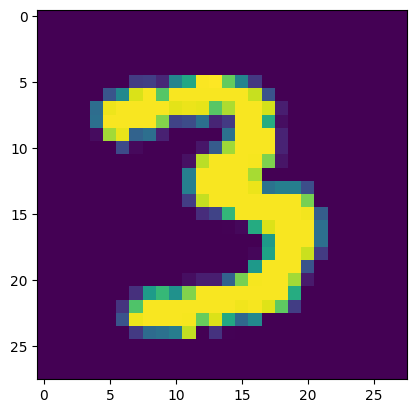

الحقيقة: 3
تنبؤ النموذج: 3


In [ ]:
import matplotlib.pyplot as plt

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

image, label = test_dataset[500]

plt.imshow(image)
plt.show()

print("الحقيقة:", label)

image_tensor = torchvision.transforms.ToTensor()(image)
model.eval()
with torch.no_grad():
    output = model(image_tensor)
    predicted = torch.argmax(output, dim=1).item()
print(f"تنبؤ النموذج: {predicted}")
